# Linear Models
The goal of this notebook is to work with Linear Models for regression problems.

***

# Preface

In [1]:
import os
os.chdir("/home/jovyan/work")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold

from src.linear_models import (
    build_design_matrix,
    maximum_likelihood_regression,
    BayesRegressor,
    LeastSquaresRegressor,
    plot_belief,
    plot_posterior
)
from src.knn import KNNR 

sns.set()
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,7)

***

# Task 1
## General fit

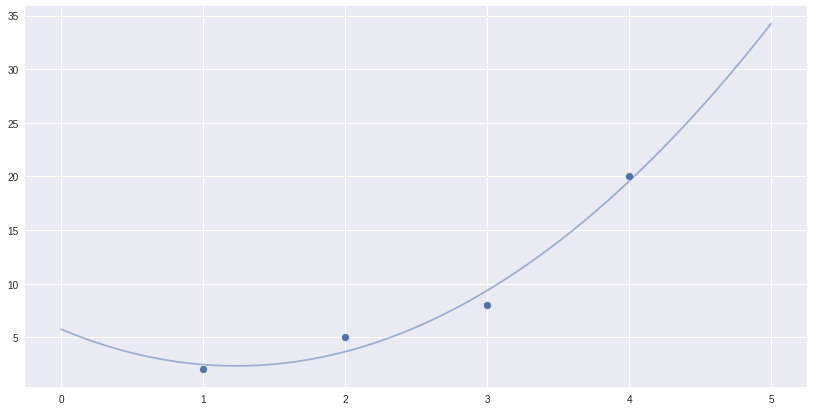

In [2]:
# init variables
X = np.array([1, 2, 3, 4])
Y = np.array([2, 5, 8, 20])
PHI = {
    "phi_0": lambda x: x*0 + 1, 
    "phi_1": lambda x: x,
    "phi_2": lambda x: x**2,
}

# get optimal parameter
W = maximum_likelihood_regression(X, PHI, Y)

# plot points vs optimal parameter
p_2 = np.polynomial.polynomial.Polynomial(W)
plt.scatter(X, Y)
plt.plot(
    np.linspace(0, 5, 100),
    p_2(np.linspace(0, 5, 100)),
    alpha=.5
);

## Copare regularization

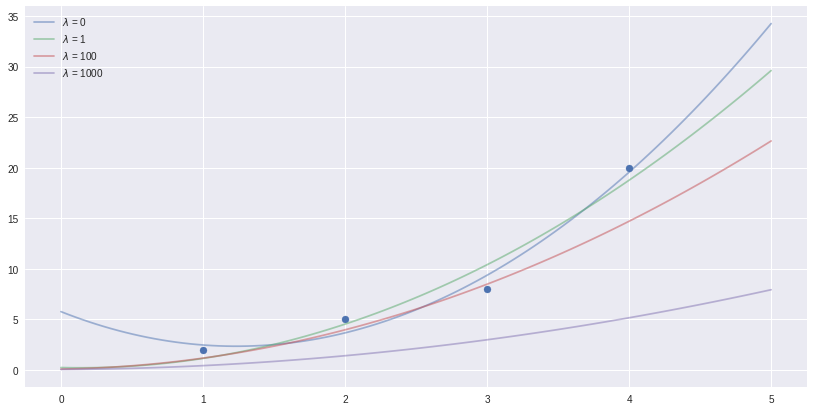

In [3]:
# compare different regularizer
reg = [0, 1, 100, 1000]
Ws = []

# get optimal parameter
for r in reg:
    Ws.append(maximum_likelihood_regression(X, PHI, Y, reg=r))

# plot points 
plt.scatter(X, Y)

# plot different regularizer
for w, reg in zip(Ws, reg):
    p = np.polynomial.polynomial.Polynomial(w)
    plt.plot(
        np.linspace(0, 5, 100),
        p(np.linspace(0, 5, 100)),
        alpha=.5,
        label="$\lambda$ = {}".format(reg),
    )
plt.legend(loc=0);

## Add another feature vector

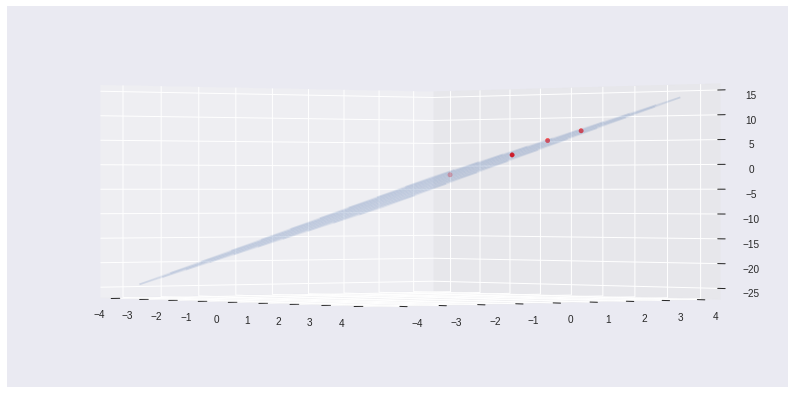

In [4]:
X = np.array([1, 2, 1, 3, -1, 2, 1.5, 3.5]).reshape(-1, 2)
Y = np.array([2, 5, -2, 7])
PHI = {
    "phi_0": lambda X: X.T[0]*0 + 1, 
    "phi_1": lambda X: X.T[0],
    "phi_2": lambda X: X.T[1],
}

# coords for the hyperplane
xx, yy = np.meshgrid(
    np.linspace(-4, 4, 100),
    np.linspace(-4, 4, 100)
)
ws = np.matrix(maximum_likelihood_regression(X, PHI, Y, reg=0))
coords = np.matrix([
    np.ones_like(xx.ravel()), 
    xx.ravel(),
    yy.ravel(),
]).T
zz = coords*ws.T
zz = np.asarray(zz.reshape(xx.shape))

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(0, -40)
ax.scatter3D(X.T[0], X.T[1], zs=Y, color="red")
ax.plot_wireframe(xx, yy, zz, alpha=.1,rstride=10, cstride=10);

# Task 2

## Bayes Regressor

In [5]:
# create a bayes regressor
PHI = {
    "phi_0": lambda x: x*0 + 1, 
    "phi_1": lambda x: x,
}

br = BayesRegressor(
    phi=PHI,
    a = 2.0, # to initialize
    b_std = 0.2, # to initialize
)

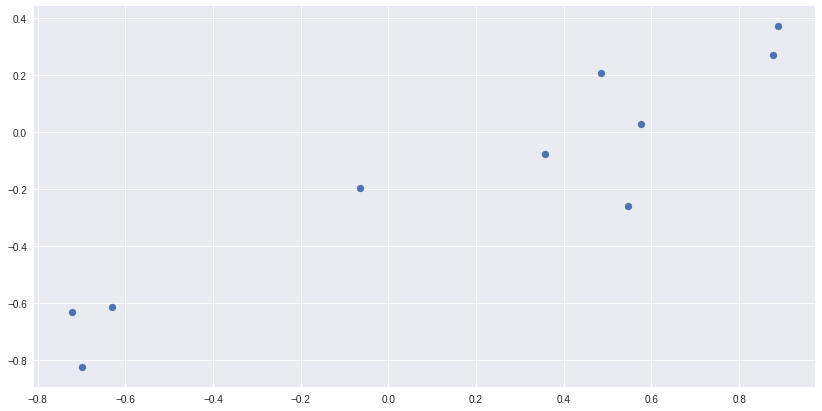

In [6]:
# create synthetic data
SIZE = 10
x = np.random.uniform(-1, 1, size=SIZE)
y = -0.3 + 0.5*x + 0.2*np.random.normal(size=SIZE)
plt.scatter(x, y);

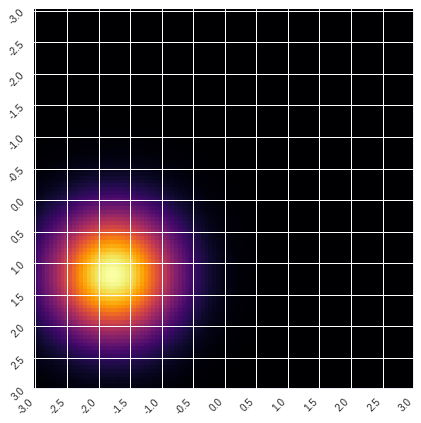

In [7]:
# belief before seeing the samples
plot_belief(br, -3, 3, )

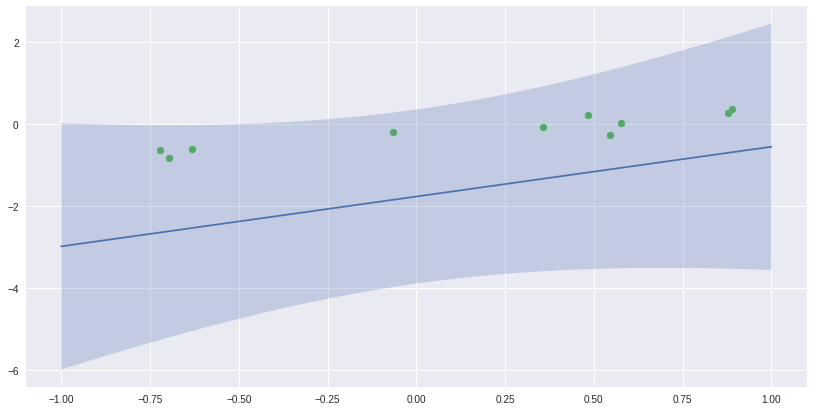

In [8]:
# posterior before seeing the samples
plot_posterior(br, -1, 1)
plt.scatter(x, y)

In [9]:
# fitting the samples
br.fit(x,y)

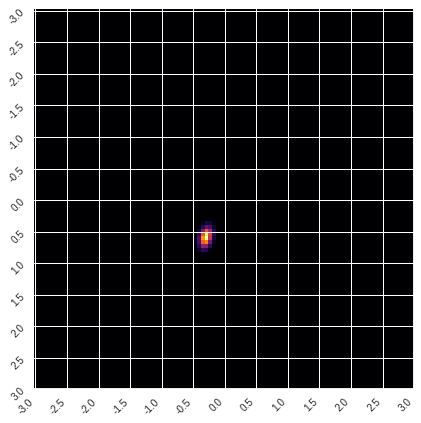

In [10]:
# belief after seeing the samples
plot_belief(br, -3, 3, )

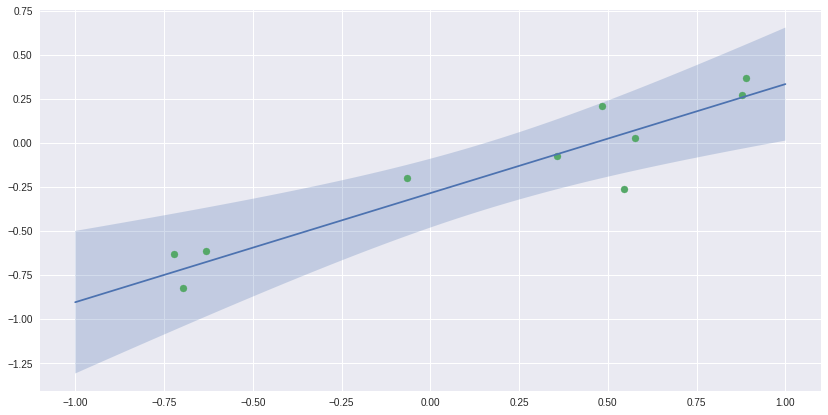

In [11]:
# posterior after seeing the samples
plot_posterior(br, -1, 1)
plt.scatter(x, y)

# Task 3
In this task the least squares regression shall be compared to the [KNN-Regressor](./01_KNN.ipynb#Task-4) previously built

In [12]:
# Load the data
df_airfoil = pd.read_csv("./data/airfoil_self_noise.csv", sep="\t", names=["x1","x2","x3","x4","x5","y"])

X = df_airfoil.drop("y", axis=1).values
y = df_airfoil["y"].values

In [13]:
# extract each value as it is
PHI = {
    "phi_0": lambda x: np.ones(x.shape[0]), 
    "phi_1": lambda x: x.T[0],
    "phi_2": lambda x: x.T[1],
    "phi_3": lambda x: x.T[2],
    "phi_4": lambda x: x.T[3],
    "phi_5": lambda x: x.T[4],    
}

In [14]:
# not regularized
mse = -cross_val_score(LeastSquaresRegressor(PHI), X, y, verbose=1, cv=10, scoring="neg_mean_squared_error")
mse.mean()

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


26.263342022337724

In [15]:
# regularized
mse = -cross_val_score(LeastSquaresRegressor(PHI, reg=.015), X, y, verbose=1, cv=10, scoring="neg_mean_squared_error")
mse.mean()

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


26.206880529886462


# Task 4

In [16]:
# load and prepare the data
df_parkinson = pd.read_excel("./data/parkinsons_updrs.xls")
X = df_parkinson.drop(["motor_UPDRS", "total_UPDRS"], axis=1).values
y =df_parkinson["total_UPDRS"]

In [17]:
# to be automated
phi = {
    "phi_0": lambda x: np.ones(x.shape[0]), 
    "phi_1": lambda x: x.T[0],
    "phi_2": lambda x: x.T[1],
    "phi_3": lambda x: x.T[2],
    "phi_4": lambda x: x.T[3],
    "phi_5": lambda x: x.T[4],
    "phi_6": lambda x: x.T[5],
    "phi_7": lambda x: x.T[6],
    "phi_8": lambda x: x.T[7],
    "phi_9": lambda x: x.T[8],
    "phi_10": lambda x: x.T[9],
    "phi_11": lambda x: x.T[10],
    "phi_12": lambda x: x.T[11],
    "phi_13": lambda x: x.T[12],
    "phi_14": lambda x: x.T[13],
    "phi_15": lambda x: x.T[14],
    "phi_16": lambda x: x.T[15],
}

In [18]:
# not regularized
mse = -cross_val_score(LeastSquaresRegressor(phi), X, y, verbose=1, cv=10, scoring="neg_mean_squared_error")
mse.mean()

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


127.81840643337134

In [19]:
# regularized
mse = -cross_val_score(LeastSquaresRegressor(phi, reg=10), X, y, verbose=1, cv=10, scoring="neg_mean_squared_error")
mse.mean()

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


122.80371759255738

In [22]:
# knnr
mse = cross_val_score(KNNR(), X, y, verbose=1, cv=10)
mse.mean()

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.7s finished


153.46245749364385